In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
d = pd.read_csv('draco.csv').values

- ra: right ascension (in degrees)
- dec: declination (in degrees)
- snr: signal-to-noise ratio of the stellar spectrum
- vlos: the line-of-sight (i.e. radial) velocity (in km/s)
- temp: the effective temperature Teff of the star (in units of K)
- logg: the (base-10 logarithm) of the surface gravity acceleration g (in cgs units)
- metallicity: the estimated proportion of elements heavier than helium in the star
(in [Fe/H] units)
- galaxy: estimated galaxy membership (binary class)

In [33]:
ra = d[:,0]
dec = d[:,1]
snr = d[:,2]
vlos = d[:,3]
temp = d[:,4]
grav = d[:,5]
metal = d[:,6]
gal = d[:,7]

In [85]:
dat = d[:,:7]
dat[0]

array([ 2.60011500e+02,  5.78158889e+01,  3.00000000e+00, -2.94100000e+02,
        5.92300000e+03,  3.70000000e+00, -1.30000000e+00])

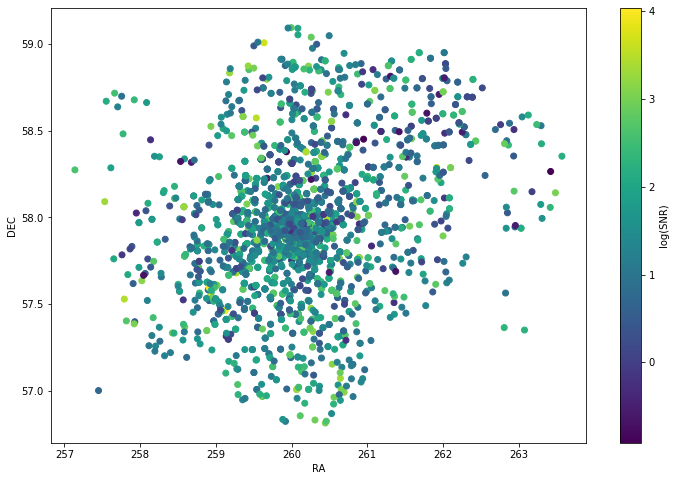

In [314]:
plt.figure(figsize = (12,8))
plt.scatter(ra, dec, c=np.log(snr))
c = plt.colorbar()
c.set_label('log(SNR)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.savefig('snr.png')

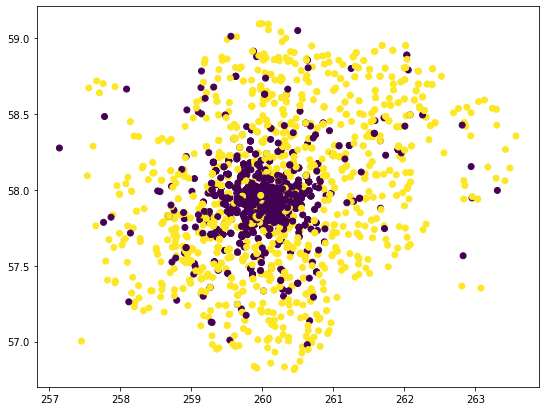

In [217]:
plt.figure(figsize = (9,7))
plt.scatter(ra, dec, c = gal)

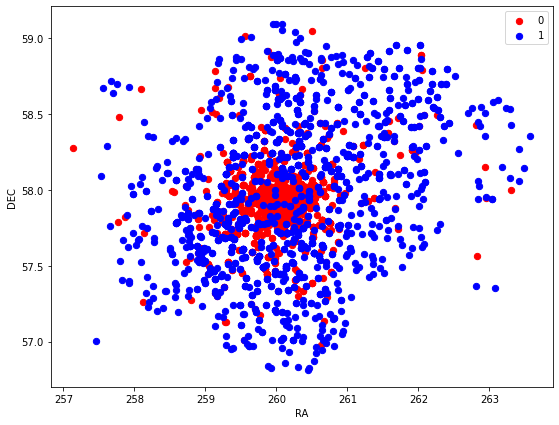

In [218]:
cdict = {0: 'red', 1: 'blue'}

fig, ax = plt.subplots(figsize = (9,7))
for g in np.unique(gal):
    ix = np.where(gal == g)
    ax.scatter(ra[ix], dec[ix], c = cdict[g], label = int(g), s = 40)
ax.legend()
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

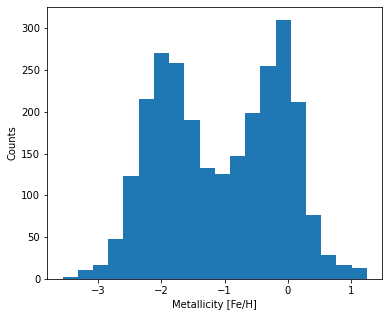

In [219]:
plt.figure(figsize=(6,5))
plt.hist(metal, bins = 20)
plt.xlabel('Metallicity [Fe/H]')
plt.ylabel('Counts')
plt.savefig('metal.png')

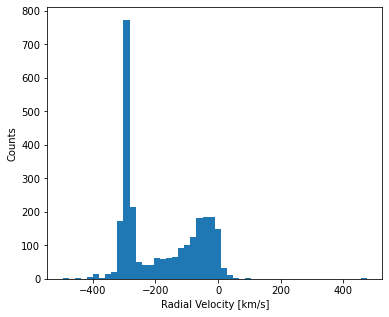

In [315]:
plt.figure(figsize=(6,5))
plt.hist(vlos, bins = 50)
plt.xlabel('Radial Velocity [km/s]')
plt.ylabel('Counts')
plt.savefig('velocity.png')

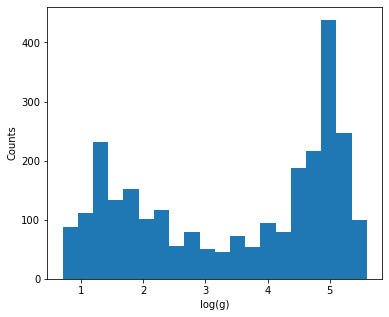

In [221]:
plt.figure(figsize=(6,5))
plt.hist(grav, bins = 20)
plt.xlabel('log(g)')
plt.ylabel('Counts')
plt.savefig('grav.png')

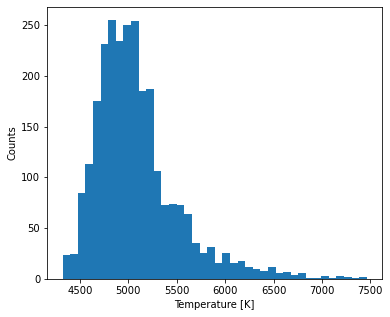

In [317]:
plt.figure(figsize=(6,5))
plt.hist(temp, bins = 40)
plt.xlabel('Temperature [K]')
plt.ylabel('Counts')
plt.savefig('temp.png')

In [223]:
from sklearn.cluster import KMeans

In [298]:
kmeans = KMeans(n_clusters = 2, n_init = 50, max_iter = 500).fit(d[:,:7])
group = kmeans.labels_

In [293]:
ra0 = []
ra1 = []

dec0 = []
dec1 = []

snr1 = []
snr0 = []

v1 = []
v0 = []

temp0 =[]
temp1 = []

grav0 = []
grav1 = []

m1 = []
m0 = []

for i in range(len(group)):
    if group [i] == 0:
        m0.append(metal[i])
        v0.append(vlos[i])
        snr0.append(snr[i])
        grav0.append(grav[i])
        temp0.append(temp[i])
        ra0.append(ra[i])
        dec0.append(dec[i])
    elif group [i] == 1:
        m1.append(metal[i])
        v1.append(vlos[i])
        snr1.append(snr[i])
        grav1.append(grav[i])
        temp1.append(temp[i])
        ra1.append(ra[i])
        dec1.append(dec[i])


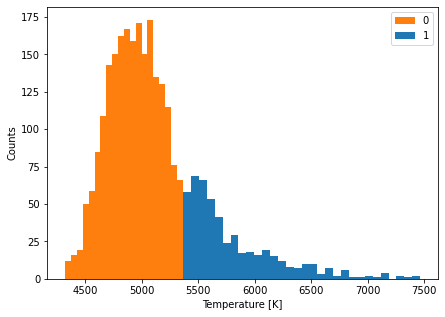

In [339]:
plt.figure(figsize=(7,5))
plt.hist(temp0, bins = 20, color = "tab:orange", label = '0')
plt.hist(temp1, bins = 30, color = "tab:blue", label = '1')
plt.xlabel('Temperature [K]')
plt.ylabel('Counts')
plt.legend()
#plt.savefig('temp_group.png')

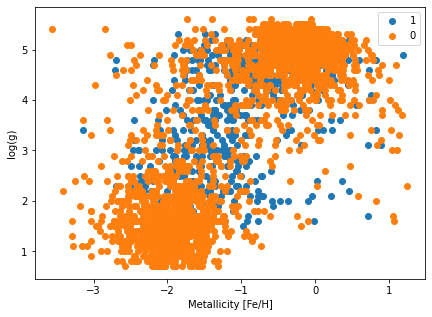

In [333]:
plt.figure(figsize=(7,5))
plt.scatter(m1, grav1, label = '1')
plt.scatter(m0, grav0, label = '0')
plt.xlabel('Metallicity [Fe/H]')
plt.ylabel('log(g)')
plt.legend()
plt.savefig('kc_metal_grav.png')

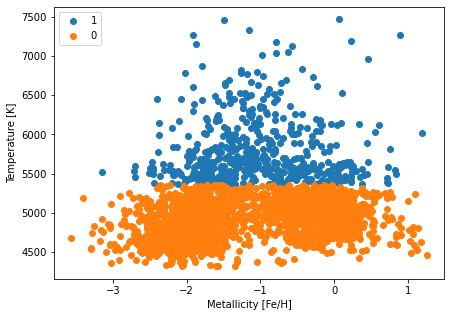

In [334]:
plt.figure(figsize=(7,5))
plt.scatter(m1, temp1, label = '1')
plt.scatter(m0, temp0, label = '0')
plt.xlabel('Metallicity [Fe/H]')
plt.ylabel('Temperature [K]')
plt.legend()
plt.savefig('kc_metal_temp.png')

In [340]:
np.sum(group == gal)/len(gal)*100

49.15126367408525

In [341]:
np.sum((group-1)*(-1) == gal)/len(gal)*100

50.84873632591474

In [263]:
np.sum(group == gal)

1377

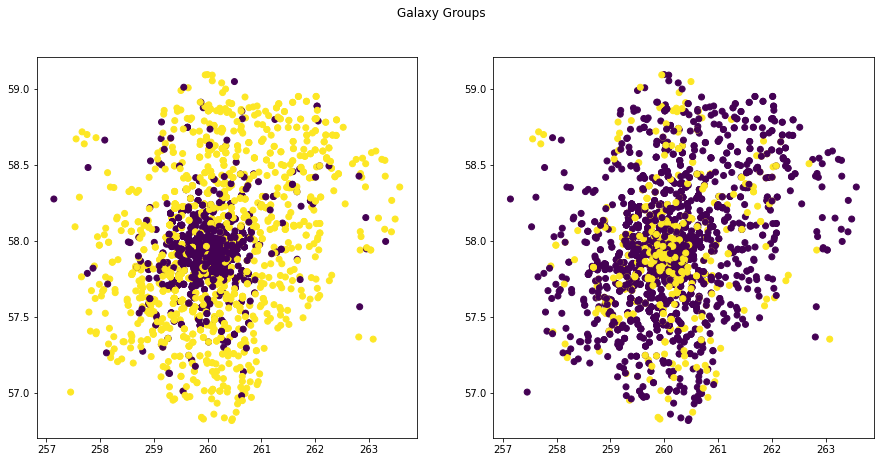

In [342]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,7))
fig.suptitle('Galaxy Groups')
ax1.scatter(ra, dec, c=gal)
ax2.scatter(ra, dec, c=group)

In [165]:
(group-1)*(-1)

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [264]:
len(group)

2651

In [265]:
len(d[:500,:7])

500

In [254]:
from sklearn.mixture import GaussianMixture

In [374]:
gm = GaussianMixture(n_components=2).fit(d[:,:7])
gm_group = gm.predict(d[:,:7])
gm.means_

array([[ 2.60020606e+02,  5.79319275e+01,  5.81581792e+00,
        -2.92045006e+02,  4.94153486e+03,  1.69158638e+00,
        -1.96357846e+00],
       [ 2.60183617e+02,  5.79694130e+01,  6.67826142e+00,
        -1.15902017e+02,  5.17634062e+03,  4.50915419e+00,
        -5.19388387e-01]])

In [375]:
gm_ra0 = []
gm_ra1 = []

gm_dec0 = []
gm_dec1 = []

gm_snr1 = []
gm_snr0 = []

gm_v1 = []
gm_v0 = []

gm_temp0 =[]
gm_temp1 = []

gm_grav0 = []
gm_grav1 = []

gm_m1 = []
gm_m0 = []

for i in range(len(gm_group)):
    if group [i] == 0:
        gm_m0.append(metal[i])
        gm_v0.append(vlos[i])
        gm_snr0.append(snr[i])
        gm_grav0.append(grav[i])
        gm_temp0.append(temp[i])
        gm_ra0.append(ra[i])
        gm_dec0.append(dec[i])
    elif group [i] == 1:
        gm_m1.append(metal[i])
        gm_v1.append(vlos[i])
        gm_snr1.append(snr[i])
        gm_grav1.append(grav[i])
        gm_temp1.append(temp[i])
        gm_ra1.append(ra[i])
        gm_dec1.append(dec[i])


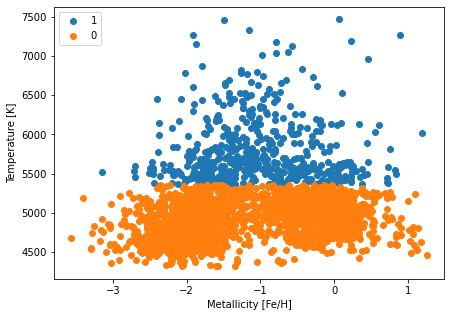

In [389]:
plt.figure(figsize=(7,5))
plt.scatter(gm_m1, gm_temp1, label = '1')
plt.scatter(gm_m0, gm_temp0, label = '0')
plt.xlabel('Metallicity [Fe/H]')
plt.ylabel('Temperature [K]')
plt.legend()
plt.savefig('gmm_metal_temp.png')

In [378]:
np.sum(gm_group == gal)/len(gal)*100

89.1361750282912

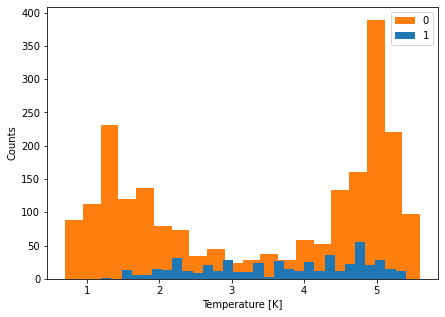

In [382]:
plt.figure(figsize=(7,5))
plt.hist(gm_grav0, bins = 20, color = "tab:orange", label = '0')
plt.hist(gm_grav1, bins = 30, color = "tab:blue", label = '1')
plt.xlabel('Temperature [K]')
plt.ylabel('Counts')
plt.legend()

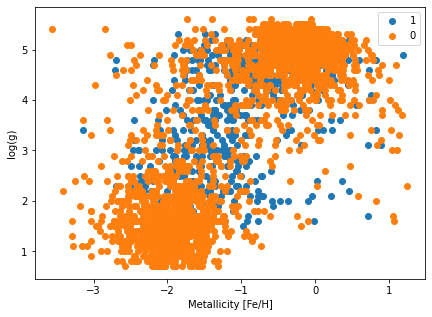

In [392]:
plt.figure(figsize=(7,5))
plt.scatter(gm_m1, gm_grav1, label = '1')
plt.scatter(gm_m0, gm_grav0, label = '0')
plt.xlabel('Metallicity [Fe/H]')
plt.ylabel('log(g)')
plt.legend()
plt.savefig('gmm_metal_grav.png')